In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'  # Log all TensorFlow messages
import tensorflow as tf


In [2]:
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt


In [3]:
import tensorflow as tf
tf.random.set_seed(42)
import tensorflow as tf
tf.config.experimental.enable_op_determinism()
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt


In [4]:
IMAGE_SIZE=256
BATCH_SIZE=32
CHANNELS=3
EPOCHS=10
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "Diagnosis of Diabetic Retinopathy",
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)


Found 2838 files belonging to 3 classes.


In [5]:
class_names = dataset.class_names
class_names


['test', 'train', 'valid']

In [6]:
len(dataset)

89

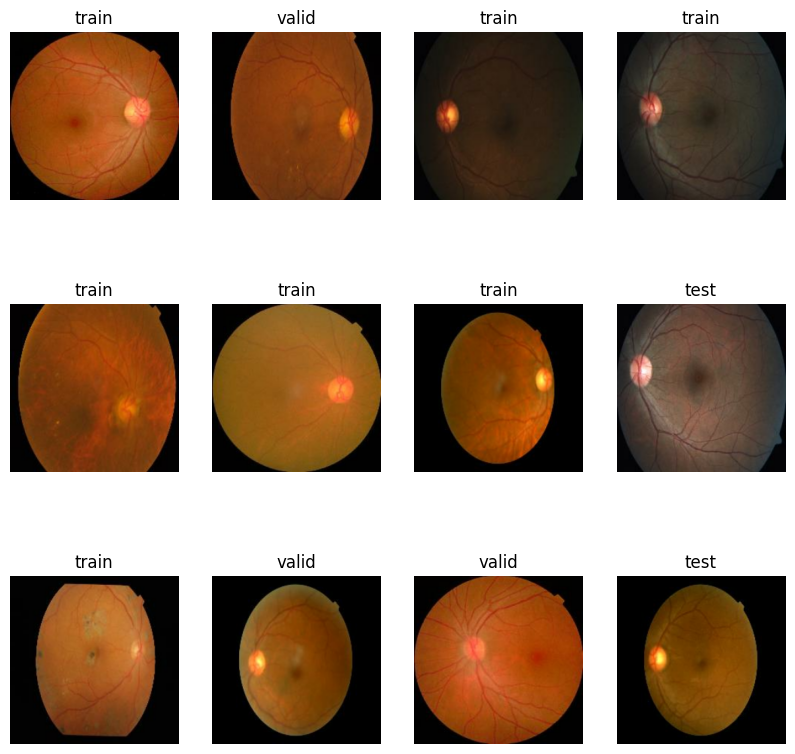

In [7]:
plt.figure(figsize=(10,10))
for image_batch, label_batch in dataset.take(1):
    for i in range(12):
        ax=plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]]) 
        plt.axis("off")


In [8]:
len(dataset)

89

In [9]:
train_ds=dataset.take(54)
len(train_ds)

54

In [10]:
val_size=0.1
len(dataset)*val_size

8.9

In [11]:
def get_dataset_partition_tf(ds,train_split=0.8,val_split=0.1,test_split=0.1,shuffle=True,shuffle_size=10000):
    ds_size=len(ds)
    if shuffle:
        ds=ds.shuffle(shuffle_size,seed=12)

    train_size=int(train_split * ds_size)
    val_size=int(val_split * ds_size)
    
    train_ds=ds.take(train_size)
    val_ds=ds.skip(train_size).take(val_size)
    test_ds=ds.skip(train_size).skip(val_size)

    return train_ds,val_ds,test_ds


In [12]:
train_ds,val_ds,test_ds=get_dataset_partition_tf(dataset)

In [13]:
len(train_ds) 

71

In [14]:
len(val_ds)

8

In [15]:
len(test_ds)

10

In [16]:
train_ds=train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds=val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds=test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)


In [17]:
  resize_and_rescale = tf.keras.Sequential([
    layers.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.Rescaling(1.0 / 255)
])


In [18]:
data_augmentation=tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.Rescaling(1.0/255)
])


In [19]:
from tensorflow.keras import models, layers

# Define constants
IMAGE_SIZE = 256
CHANNELS = 3
n_classes = 3

# Define the preprocessing layers
resize_and_rescale = tf.keras.Sequential([
    layers.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.Rescaling(1.0 / 255)
])

data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2)
])

# Define the model
model = models.Sequential([
    layers.Input(shape=(IMAGE_SIZE, IMAGE_SIZE, CHANNELS)),  # Input layer with correct shape
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

# Print the model summary
model.summary()



Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_2 (Sequential)   (None, 256, 256, 3)       0         
                                                                 
 sequential_3 (Sequential)   (None, 256, 256, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                  

In [19]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [21]:
history=model.fit(
    train_ds,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=val_ds
)

Epoch 1/10
71/71 [==============================] - 278s 4s/step - loss: 0.7874 - accuracy: 0.7250 - val_loss: 0.7934 - val_accuracy: 0.6992
Epoch 2/10
71/71 [==============================] - 243s 3s/step - loss: 0.7695 - accuracy: 0.7303 - val_loss: 0.8101 - val_accuracy: 0.6992
Epoch 3/10
71/71 [==============================] - 234s 3s/step - loss: 0.7570 - accuracy: 0.7303 - val_loss: 0.7933 - val_accuracy: 0.6992
Epoch 4/10
71/71 [==============================] - 255s 4s/step - loss: 0.7591 - accuracy: 0.7303 - val_loss: 0.7941 - val_accuracy: 0.6992
Epoch 5/10
71/71 [==============================] - 301s 4s/step - loss: 0.7571 - accuracy: 0.7303 - val_loss: 0.7877 - val_accuracy: 0.6992
Epoch 6/10
71/71 [==============================] - 297s 4s/step - loss: 0.7547 - accuracy: 0.7303 - val_loss: 0.7904 - val_accuracy: 0.6992
Epoch 7/10
71/71 [==============================] - 240s 3s/step - loss: 0.7565 - accuracy: 0.7303 - val_loss: 0.7850 - val_accuracy: 0.6992
Epoch 8/10
71

In [22]:
scores=model.evaluate(test_ds)

10/10 [==============================] - 30s 1s/step - loss: 0.7936 - accuracy: 0.7125


In [23]:
scores

[0.79356849193573, 0.7124999761581421]

In [24]:
history.history['accuracy']

[0.7250220775604248,
 0.7303271293640137,
 0.7303271293640137,
 0.7303271293640137,
 0.7303271293640137,
 0.7303271293640137,
 0.7303271293640137,
 0.7303271293640137,
 0.7303271293640137,
 0.7303271293640137]

In [25]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']


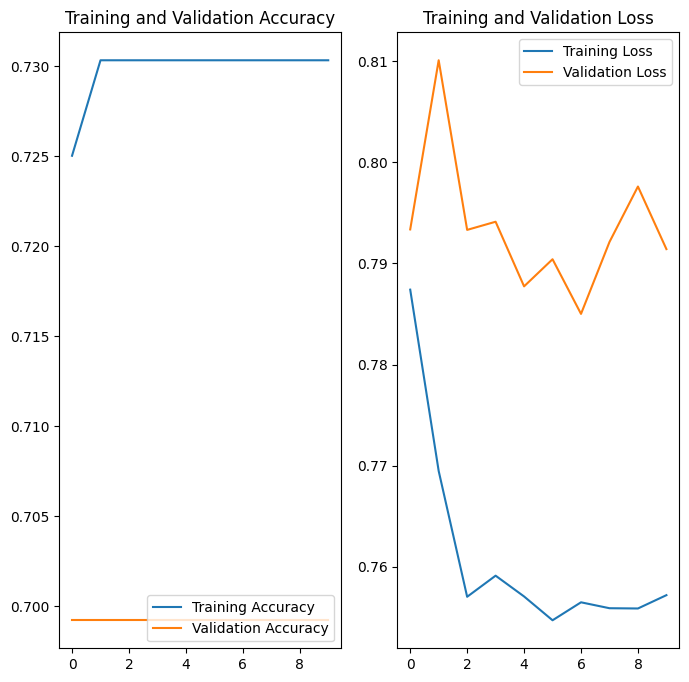

In [26]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


first image to predict
actual label: valid
1/1 [==============================] - 4s 4s/step
predicted label: train


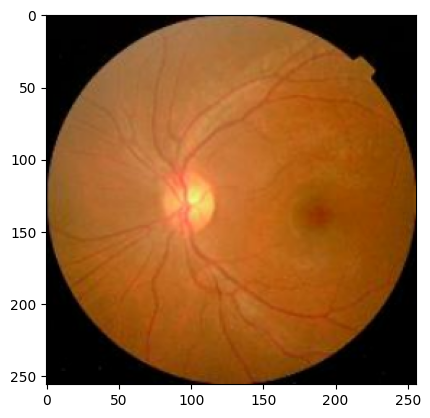

In [27]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):
    
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])


In [28]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)
    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 132ms/step


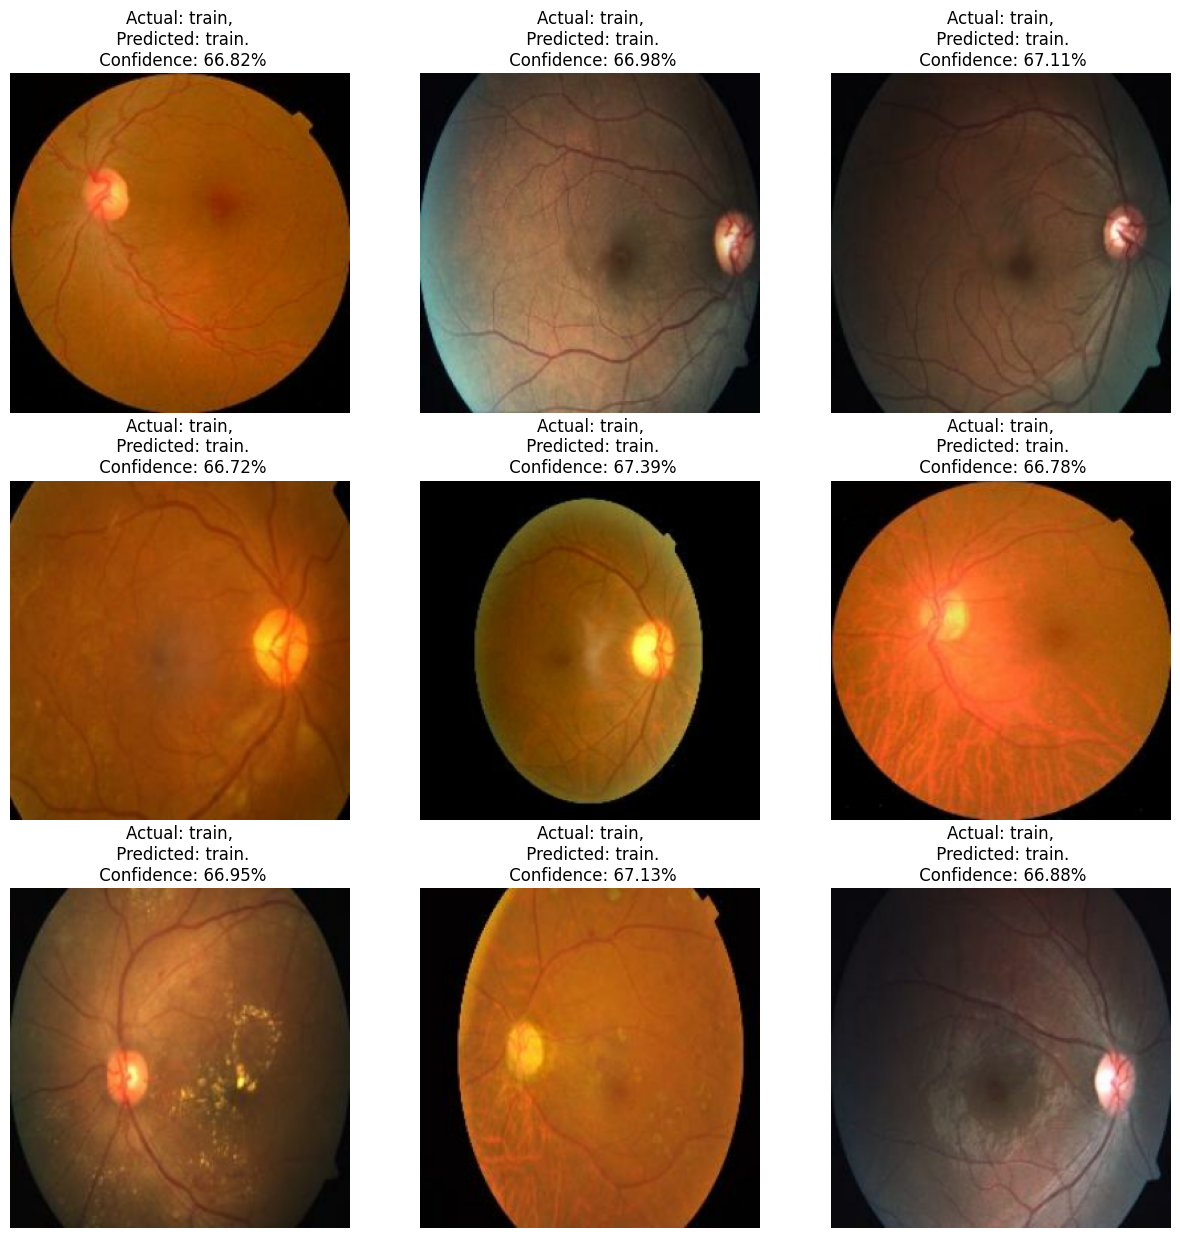

In [29]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")


In [30]:
model_version=1
model.save("model.h5")
